<a href="https://colab.research.google.com/github/KKugi/machine-learning-programming/blob/main/11_29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print('X_train 데이터의 형태:',X_train.shape)
print('X_train[0] 데이터의 형태:',X_train[0].shape)
print('y_train 데이터의 형태:',y_train.shape)

X_train 데이터의 형태: (60000, 28, 28)
X_train[0] 데이터의 형태: (28, 28)
y_train 데이터의 형태: (60000,)


In [ ]:
num = X_train[0]
for i in range(28):
    for j in range(28):
        print('{:4d}'.format(num[i][j]), end='')
    print()

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0
   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0
   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0

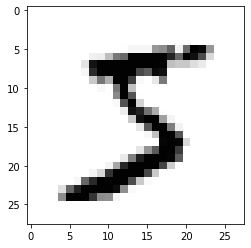

In [ ]:
plt.imshow(num, cmap='Greys', interpolation='nearest')

In [ ]:
print('y_train[0] = ',y_train[0])

y_train[0] =  5


In [ ]:
X_trian, X_test = X_train / 255 , X_test / 255

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(10,activation='softmax'),
])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=4)

Epoch 1/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2199 - accuracy: 0.9513
Epoch 2/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1971 - accuracy: 0.9563
Epoch 3/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1910 - accuracy: 0.9571
Epoch 4/4
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1920 - accuracy: 0.9592


### 12_01

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print("신경망 모델의 학습 결과: ")
eval_loss, eval_acc = model.evaluate(X_test,y_test)
print("test 데이터의 손실값",eval_loss,'test 데이터의 정확도',eval_acc)

신경망 모델의 학습 결과: 
313/313 [==============================] - 1s 2ms/step - loss: 2.3786 - accuracy: 0.1123
test 데이터의 손실값 2.3785784244537354 test 데이터의 정확도 0.11230000108480453


In [ ]:
import numpy as np

In [ ]:
def softmax(a):
    exp_of_a = np.exp(a)
    sum_exp = np.sum(exp_of_a)
    y = exp_of_a / sum_exp
    return y

a = np.array([0.5,4.1,2.5,5.6,1.2])
print("신경망의 예측값: ",a)
print("소프트맥스 함수의 출력: ",softmax(a))

신경망의 예측값:  [0.5 4.1 2.5 5.6 1.2]
소프트맥스 함수의 출력:  [0.00473882 0.17343248 0.03501541 0.77727047 0.00954281]


In [ ]:
print("소프트맥스 함수의 최대값: ",np.max(softmax(a)))

소프트맥스 함수의 최대값:  0.7772704668966948


In [ ]:
a = np.array([0.5,4.1,2.5,5.6,1.2]) * 2
print("신경망의 예측값: ",a)
print("소프트맥스 함수의 출력: ",softmax(a))
print("소프트맥스 함수의 최대값: ",np.max(softmax(a)))

신경망의 예측값:  [ 1.   8.2  5.  11.2  2.4]
소프트맥스 함수의 출력:  [3.53328547e-05 4.73259126e-02 1.92910850e-03 9.50566364e-01
 1.43281791e-04]
소프트맥스 함수의 최대값:  0.9505663642857384


- 원-핫 인코딩

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
data = np.array([0,1,2,3,4])

In [ ]:
print("인코딩할 원본 데이터",data)
encoded = to_categorical(data)
print('원-핫 인코딩된 데이터: ')
print(encoded)

인코딩할 원본 데이터 [0 1 2 3 4]
원-핫 인코딩된 데이터: 
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [ ]:
# 정답이 3이 인코딩된 target과 신경망의 예측값 y_hat이 있다고 가정
target = np.array([0,0,0,1,0])
y_hat = np.array([0.005,0.173,0.035,0.777,0.01])

In [ ]:
def mse(y,t): # 평균제곱오차
    return ((y-t)**2).mean()

In [ ]:
print('y_hat과 target과의 오차: ',mse(y_hat, target))

y_hat과 target과의 오차:  0.016201599999999997


In [ ]:
# 정답에서 많이 벗어난 other_y_hat 추정치
other_y_hat = np.array([0.2, 0.3, 0.4, 0.01, 0.09])

In [ ]:
print('other_y_hat과 target과의 오차: ',mse(other_y_hat, target))

other_y_hat과 target과의 오차:  0.25564


In [ ]:
# 교차 엔트로피 함수를 에러 함수로 사용
def cee(y, t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

In [ ]:
t = np.array([0,0,1])
y_hat1 = np.array([0.4,0.05,0.55])
y_hat2 = np.array([0.9,0.09,0.01])

In [ ]:
# y_hat 추정치와 정답과의 오차
print('y_hat1과 cee: {:.2f}'.format(cee(y_hat1,t)))
print('y_hat2과 cee: {:.2f}'.format(cee(y_hat2,t)))
print('두 값의 비 : {:.2f}'.format(cee(y_hat2,t) / cee(y_hat1,t)))

y_hat1과 cee: 0.60
y_hat2과 cee: 4.61
두 값의 비 : 7.70


In [ ]:
print('y_hat1과 cee: {:.2f}'.format(mse(y_hat1,t)))
print('y_hat2과 cee: {:.2f}'.format(mse(y_hat2,t)))
print('두 값의 비 : {:.2f}'.format(mse(y_hat2,t) / mse(y_hat1,t)))

y_hat1과 cee: 0.12
y_hat2과 cee: 0.60
두 값의 비 : 4.93
